# Random Forest Regression

A [random forest](https://en.wikipedia.org/wiki/Random_forest) is a meta estimator that fits a number of classifying [decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement (can be changed by user).

Generally, Decision Tree and Random Forest models are used for classification task. However, the idea of Random Forest as a regularizing meta-estimator over single decision tree is best demonstrated by applying them to regresion problems. This way it can be shown that, **in the presence of random noise, single decision tree is prone to overfitting and learn spurious correlations while a properly constructed Random Forest model is more immune to such overfitting.**

## Create some syntehtic data using scikit-learn's built-in regression generator

### Import libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
# Import make_regression method to generate artificial data samples
from sklearn.datasets import make_regression

### What is *make_regression* method?

It is a convinient method/function from scikit-learn stable to generate a random regression problem. The input set can either be well conditioned (by default) or have a low rank-fat tail singular profile.

The output is generated by applying a (potentially biased) random linear regression model with `n_informative` nonzero regressors to the previously generated input and some gaussian centered noise with some adjustable scale.

In [3]:
n_samples = 100 # Number of samples
n_features = 6 # Number of features
n_informative = 3 # Number of informative features i.e. actual features which influence the output

In [4]:
X, y,coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                       random_state=None, shuffle=False,noise=20,coef=True)

### Make a data frame and create basic visualizations

#### Data Frame

In [5]:
df1 = pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,-0.747277,2.331102,-0.776310,-0.579121,-0.668374,0.671203,42.527577
1,1.967690,-0.121770,0.478062,-0.007842,1.968861,2.343217,157.750813
2,0.558361,-1.135201,-1.926729,0.822553,0.156381,-1.607263,-54.539873
3,-2.197691,-0.613102,1.350745,-0.480560,-0.311309,-0.304652,-188.725447
4,0.301213,0.222781,1.151035,0.832405,1.621726,1.057465,22.519429
5,-0.258584,-2.170848,-0.060708,-0.748314,-0.347460,0.890826,-117.102160
6,-0.166626,-1.411747,0.568418,0.582025,-0.558893,-0.197717,-70.134260
7,-0.598489,0.680975,-0.620001,0.246026,-1.091851,-0.703635,-11.606313
8,-0.737980,0.426484,0.187143,-1.046473,0.775033,-0.317475,-43.613407
9,0.485027,0.510784,0.836454,0.542981,1.806135,-0.618730,68.017477


#### Scatter plots

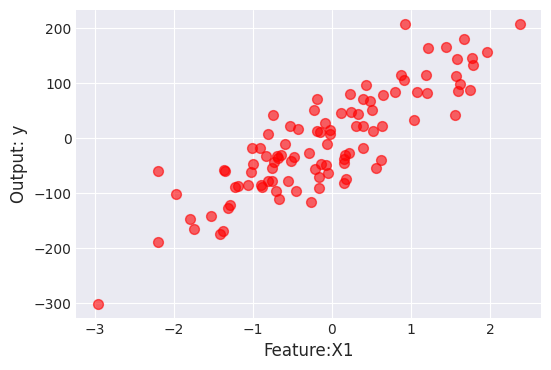

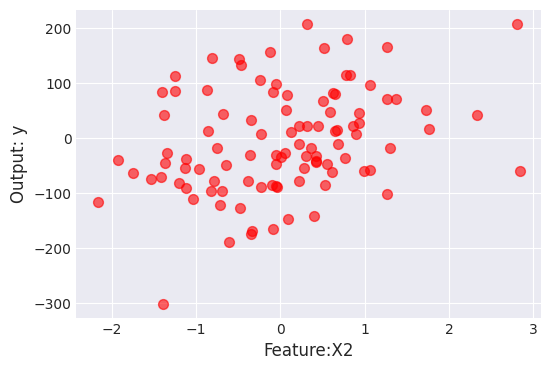

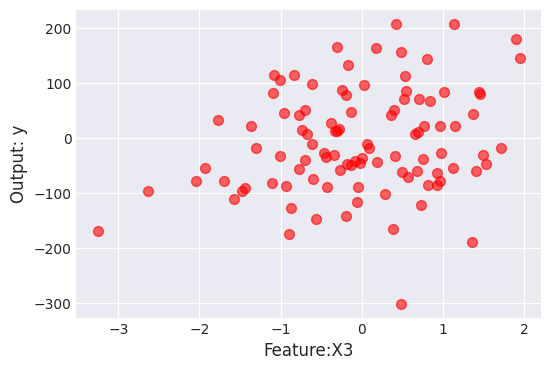

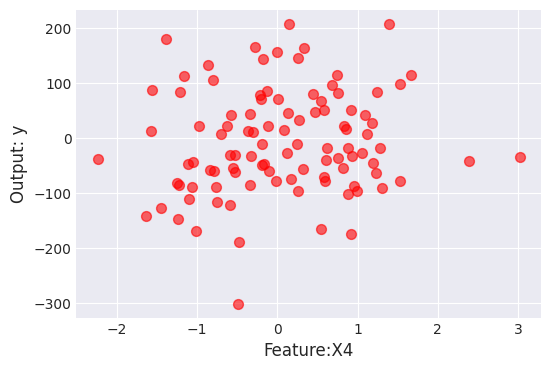

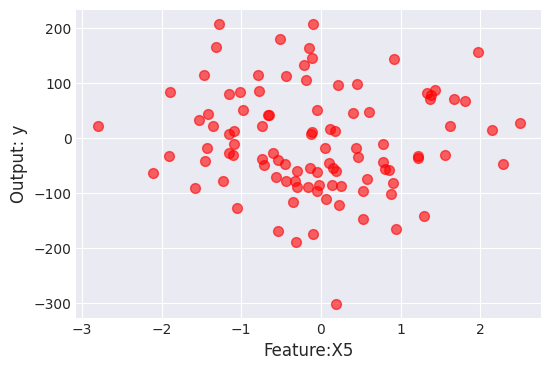

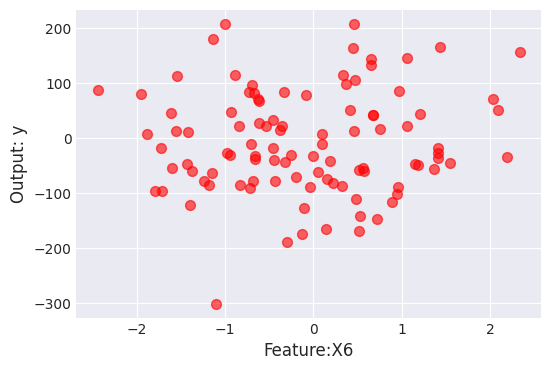

In [6]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(df[col],df['y'],c='red',s=50,alpha=0.6)

#### It is clear from the scatter plots that some of the features influence the output while the others don't. This is the result of choosing a particular *n_informative* in the *make_regression* method

#### Histograms of the feature space

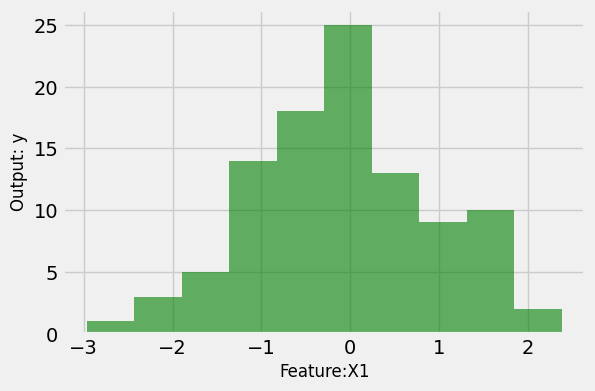

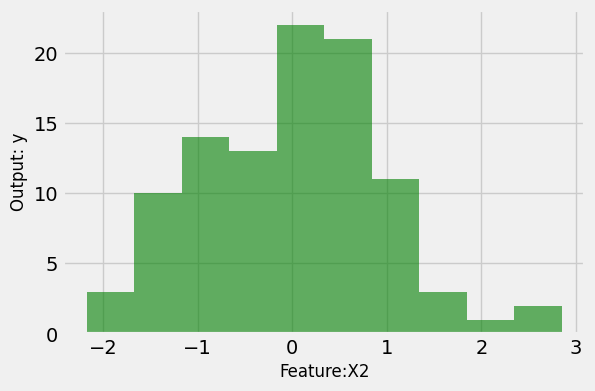

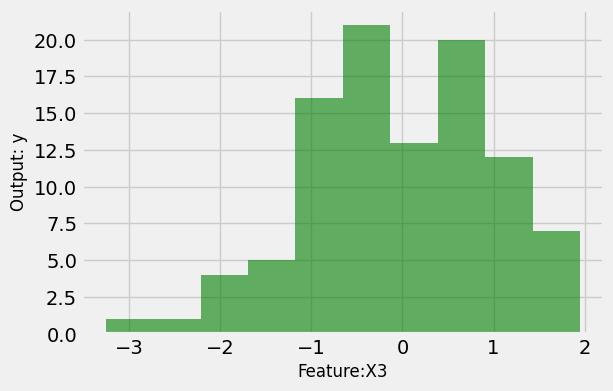

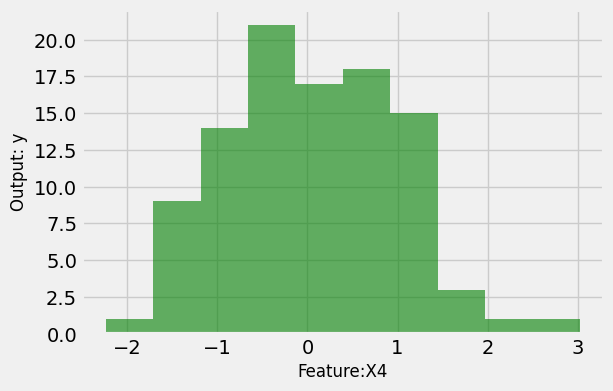

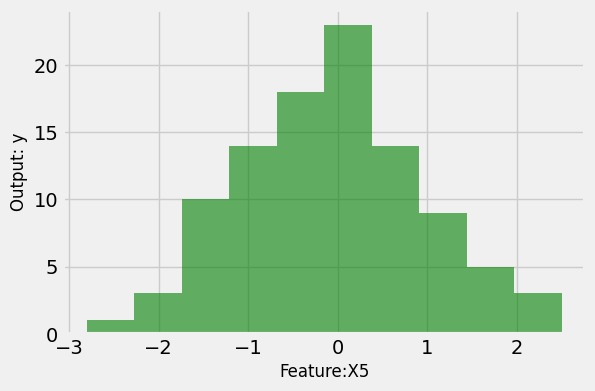

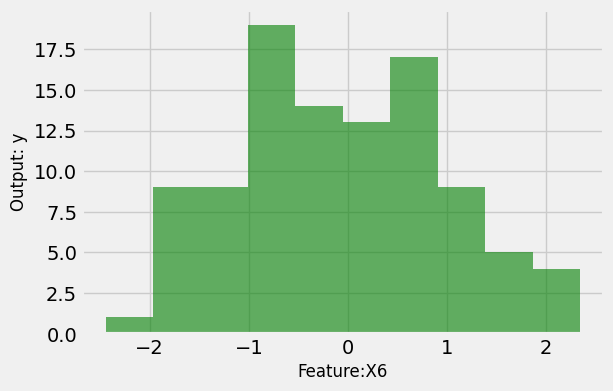

In [7]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='g')

## How will a Decision Tree regressor do?

Every run will generate different result but on most occassions, **the single decision tree regressor is likely to learn spurious features** i.e. will assign small importance to features which are not true regressors.

In [8]:
from sklearn import tree

In [9]:
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(X,y)

DecisionTreeRegressor(max_depth=5)

Relative importance of the features:  [0.81999681 0.14000427 0.01906103 0.0016175  0.01199382 0.00732658]


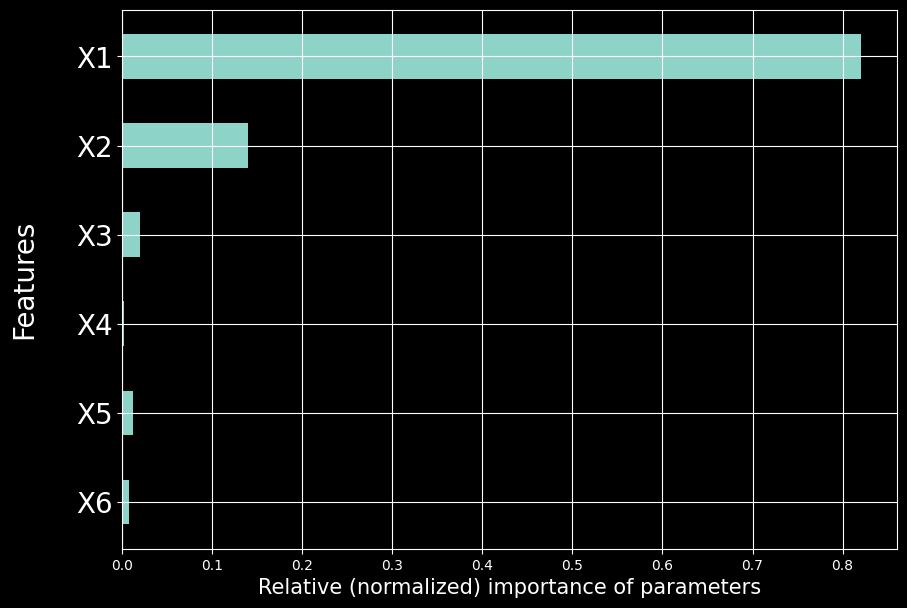

In [10]:
print("Relative importance of the features: ",tree_model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=tree_model.feature_importances_,height=0.5)

#### Print the $R^2$ score of the Decision Tree regression model

Even though the $R^2$ score is pretty high, the model is slightly flawed because it has assigned importance to regressors which have no true significance.

In [11]:
print("Regression coefficient:",tree_model.score(X,y))

Regression coefficient: 0.9739091735298606


## Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=5, max_features='auto', max_leaf_nodes=5)

#### Print the relative importance of the features

Relative importance of the features:  [9.11734871e-01 8.30287180e-02 1.95654896e-03 0.00000000e+00
 6.80683163e-04 2.59917888e-03]


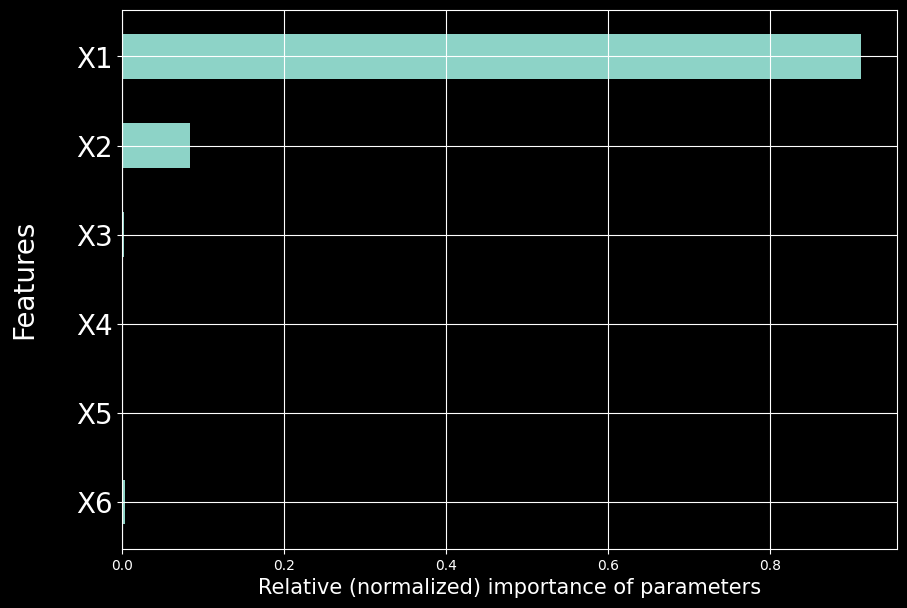

In [14]:
print("Relative importance of the features: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=model.feature_importances_,height=0.5)

#### Print the $R^2$ score of the Random Forest regression model

In [15]:
print("Regression coefficient:",model.score(X,y))

Regression coefficient: 0.8637915051643485


## Benchmark to statsmodel (ordinary least-square solution by exact analytic method)

[Statsmodel is a Python module](http://www.statsmodels.org/dev/index.html) that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [16]:
import statsmodels.api as sm

In [17]:
Xs=sm.add_constant(X)
stat_model = sm.OLS(y,Xs)
stat_result = stat_model.fit()

In [18]:
print(stat_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     382.0
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           3.23e-63
Time:                        06:41:51   Log-Likelihood:                -433.96
No. Observations:                 100   AIC:                             881.9
Df Residuals:                      93   BIC:                             900.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2625      1.950     -0.135      0.8

#### Make arrays of regression coefficients estimated by the models

In [19]:
rf_coef=np.array(coef)
stat_coef=np.array(stat_result.params[1:])

#### Show the true regression coefficients (as returned by the generator function) and the OLS model's estimated coefficients side by side

In [20]:
df_coef = pd.DataFrame(data=[rf_coef,stat_coef],columns=df.columns[:-1],index=['True Regressors', 'OLS method estimation'])
df_coef

,X1,X2,X3,X4,X5,X6
True Regressors,79.018126,41.158555,12.715162,0.000000,0.00000,0.000000
OLS method estimation,82.743362,43.079618,12.286924,0.097802,-1.73832,0.604425


### Show the relative importance of regressors side by side

For Random Forest Model, show the relative importance of features as determined by the meta-estimator. For the OLS model, show normalized t-statistic values.

**It will be clear that although the RandomForest regressor identifies the important regressors correctly, it does not assign the same level of relative importance to them as done by OLS method t-statistic**

In [21]:
df_importance = pd.DataFrame(data=[model.feature_importances_,stat_result.tvalues[1:]/sum(stat_result.tvalues[1:])],
                             columns=df.columns[:-1],
                             index=['RF Regressor relative importance', 'OLS method normalized t-statistic'])
df_importance

,X1,X2,X3,X4,X5,X6
RF Regressor relative importance,0.911735,0.083029,0.001957,0.000000,0.000681,0.002599
OLS method normalized t-statistic,0.620764,0.298071,0.089077,0.000664,-0.013067,0.004490


## Further explorations

Play with the hyperparameters of the models e.g. tree depth, leaf quantity, splitting strategy, number of trees in the forest, etc. to see how the regression model behaves. Also, play with the nature and complexity of the sample generator by writing your own nonlinear function.